In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from utils import pairwise_distances, segpath2path, point2segments
from scipy import stats

In [2]:
var_name = 'noise'
ls_value = 0, 0.1, 0.2, 0.5, 1, 2, 5, 10, #20, 50
n_condition = len(ls_value)
catchment_radius = 0.372 / 2 ## 0.372 is the wheel axle length of Freight
n_trial = 100
n_epoch_train, n_epoch_test = 120, 500
goal_idx = -1  # does not change too much
ls_model = 'pure-pursuit', 'lamb', 'visual-localisor'
ls_model_keys = ls_model
ls_model_name = 'pure-pursuit', 'differential-MB', 'visual-localisor'
ls_color = 'tab:blue', 'tab:green', 'tab:orange'
n_model = len(ls_model)

In [41]:
record_dir = 'noise_noisefreetrain_robustness_3in1_randomroute'  #### nice result
# record_dir = 'noise_noisefreetrain_robustness_3in1_randomroute_noobj'  ####

In [42]:
data_path = np.load(os.path.join('records', record_dir, 'data_path.npy'), allow_pickle=True)[()]

In [43]:
data_dist_test2goal, data_min_dist2goal, data_time_min_dist2goal = {}, {}, {}
data_dist_testtrunc2goal = {}
data_time_catchment = {}
data_test_cp_ratio = {}
data_dist_init2goal = {}

for model_name in ls_model_name:
    path_train_init = data_path[model_name]['train'][:n_condition, :, :, 0]
    path_train_goal = data_path[model_name]['train'][:n_condition, :, :, -1]
    dist_init2goal = np.linalg.norm(path_train_goal - path_train_init, axis=-1)
    dist_test2goal = np.linalg.norm(path_train_goal[:, :, :, np.newaxis] - data_path[model_name]['test'][:n_condition], axis=2)
    time_min_dist2goal = np.argmin(dist_test2goal, axis=2)
    min_dist2goal = np.min(dist_test2goal, axis=2)
    
    data_dist_test2goal[model_name] = dist_test2goal
    data_min_dist2goal[model_name] = min_dist2goal
    data_time_min_dist2goal[model_name] = time_min_dist2goal
    
    nan_mask = (time_min_dist2goal.T < np.tile(np.arange(n_epoch_test), (n_condition, n_trial, 1)).T).T
    nan_mask_path = np.moveaxis(np.tile(nan_mask, (2, 1, 1, 1)), 0, 2)
    data_dist_testtrunc2goal[model_name] = np.where(nan_mask, np.nan, dist_test2goal)
    data_path[model_name]['test_trunc'] = np.where(nan_mask_path, np.nan, data_path[model_name]['test'][:n_condition])

    time_catchment = np.argmax(dist_test2goal <= catchment_radius, axis=-1)
    data_time_catchment[model_name] = np.where(time_catchment == 0, np.nan, time_catchment)
    
    # test collision, proximity
    data_test_cp_ratio[model_name] = {}
    for cp in 'cp':
        key_cp = 'test_{}'.format(cp)
        test_cp_trunc = np.where(nan_mask, 0, data_path[model_name][key_cp][:n_condition])
        data_test_cp_ratio[model_name][key_cp] = np.count_nonzero(test_cp_trunc, axis=-1) / (time_min_dist2goal + 1)
    
    # train route length
    data_dist_init2goal = dist_init2goal

In [44]:
if record_dir == 'noise_noisefreetrain_robustness_3in1_randomroute':
    mind_default = data_min_dist2goal
    cp_default = data_test_cp_ratio
    i2g_default = data_dist_init2goal
else:
    mind_empty = data_min_dist2goal
    cp_empty = data_test_cp_ratio
    i2g_empty = data_dist_init2goal

# time controlled by obstacle avoidance

Ttest_indResult(statistic=-2.477257489630613, pvalue=0.9929613343700576)
Ttest_indResult(statistic=-2.6505139862121303, pvalue=0.995656582745558)
Ttest_indResult(statistic=-1.9257201332073721, pvalue=0.9722141089224241)
Ttest_indResult(statistic=-1.2993973482893069, pvalue=0.9023407416753877)
Ttest_indResult(statistic=-1.706613461292979, pvalue=0.9552691442977016)
Ttest_indResult(statistic=-1.1809832668955724, pvalue=0.8804869883580948)
Ttest_indResult(statistic=-3.0017848203774626, pvalue=0.9984851984728468)
Ttest_indResult(statistic=1.2513834579215604, pvalue=0.10613553821388969)
abc
Ttest_indResult(statistic=-0.2331028047946225, pvalue=0.5920388117573951)
Ttest_indResult(statistic=0.4112166127428531, pvalue=0.3406792211036657)
Ttest_indResult(statistic=1.2517329241274886, pvalue=0.10607196777819411)
Ttest_indResult(statistic=1.9949959262080699, pvalue=0.023707316301289708)
Ttest_indResult(statistic=-0.34911556932726306, pvalue=0.6363132312259605)
Ttest_indResult(statistic=0.24233667

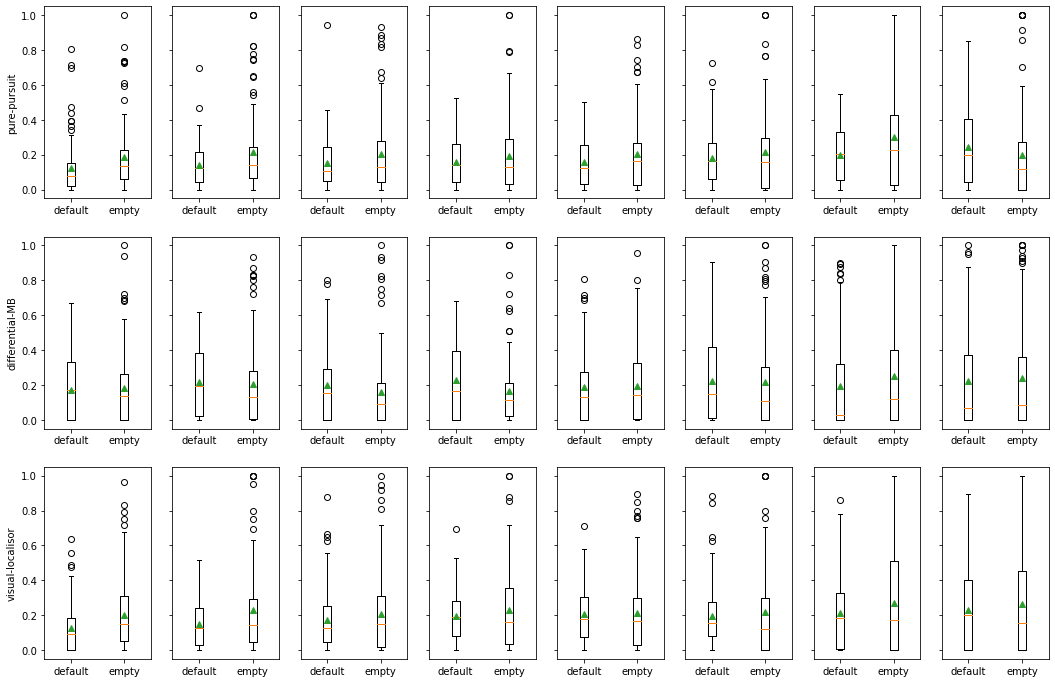

In [45]:
fig, axes = plt.subplots(3, 8, figsize=(18, 12), sharey=True)

for model_name, color, axrow in zip(ls_model_name, ls_color, axes):
    axrow[0].set_ylabel(model_name)
    for d_d, d_e, ax in zip(cp_default[model_name]['test_p'], cp_empty[model_name]['test_p'], axrow):
        ax.boxplot([d_d, d_e], showmeans=True, labels=['default', 'empty'])
        tt = stats.ttest_ind(d_d, d_e, alternative='greater')
        print(tt)
    print('abc')

Ttest_indResult(statistic=-4.009204944077735, pvalue=6.373101246403184e-05)


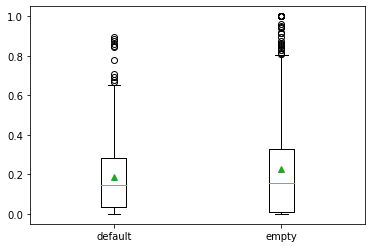

In [46]:
aa = np.ravel(cp_default[model_name]['test_p'])
bb = np.ravel(cp_empty[model_name]['test_p'])
plt.boxplot([aa, bb], showmeans=True, labels=['default', 'empty'])
tt = stats.ttest_ind(aa, bb, alternative='greater')
tt = stats.ttest_ind(aa, bb, alternative='two-sided')
print(tt)

# training route length

Ttest_indResult(statistic=-10.718362238697942, pvalue=3.1005968146635603e-26)


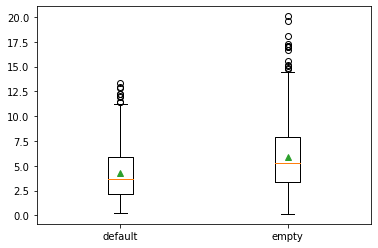

In [47]:
aa = np.ravel(i2g_default)
bb = np.ravel(i2g_empty)
plt.boxplot([aa, bb], showmeans=True, labels=['default', 'empty'])
tt = stats.ttest_ind(aa, bb, alternative='less')
print(tt)

[1.27147259e-04 2.02457803e-01]


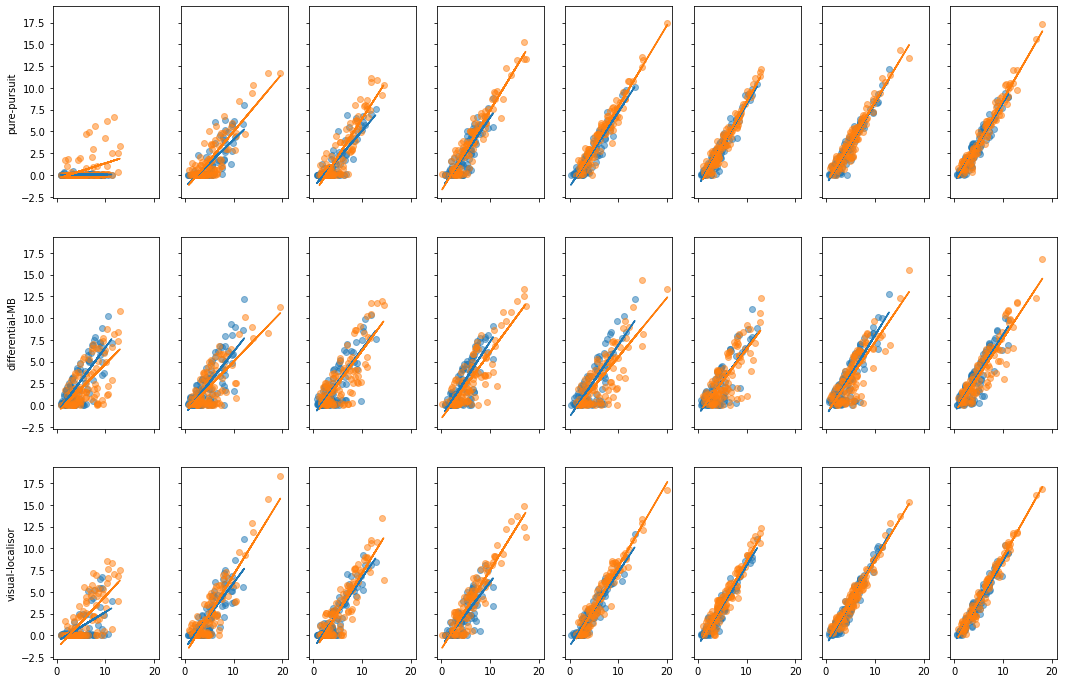

In [56]:
fig, axes = plt.subplots(3, 8, figsize=(18, 12), sharey=True, sharex=True)

data_p = []
for model_name, color, axrow in zip(ls_model_name, ls_color, axes):
    axrow[0].set_ylabel(model_name)
    for x_data, y_data in zip((i2g_default, i2g_empty), (mind_default[model_name], mind_empty[model_name])):
        for ax, xx, yy in zip(axrow, x_data, y_data):
            ax.scatter(xx, yy, alpha=0.5)
            res = stats.linregress(xx, yy)
            ax.plot(xx, res.intercept + res.slope*xx)
            data_p.append(res.pvalue)
            
print(np.sort(data_p)[-2:])

# summary

Ttest_indResult(statistic=-4.009204944077735, pvalue=0.999968134493768)
Ttest_indResult(statistic=-10.718362238697942, pvalue=3.1005968146635603e-26)
0.8261680802110415 0.8330988166833474 0.0


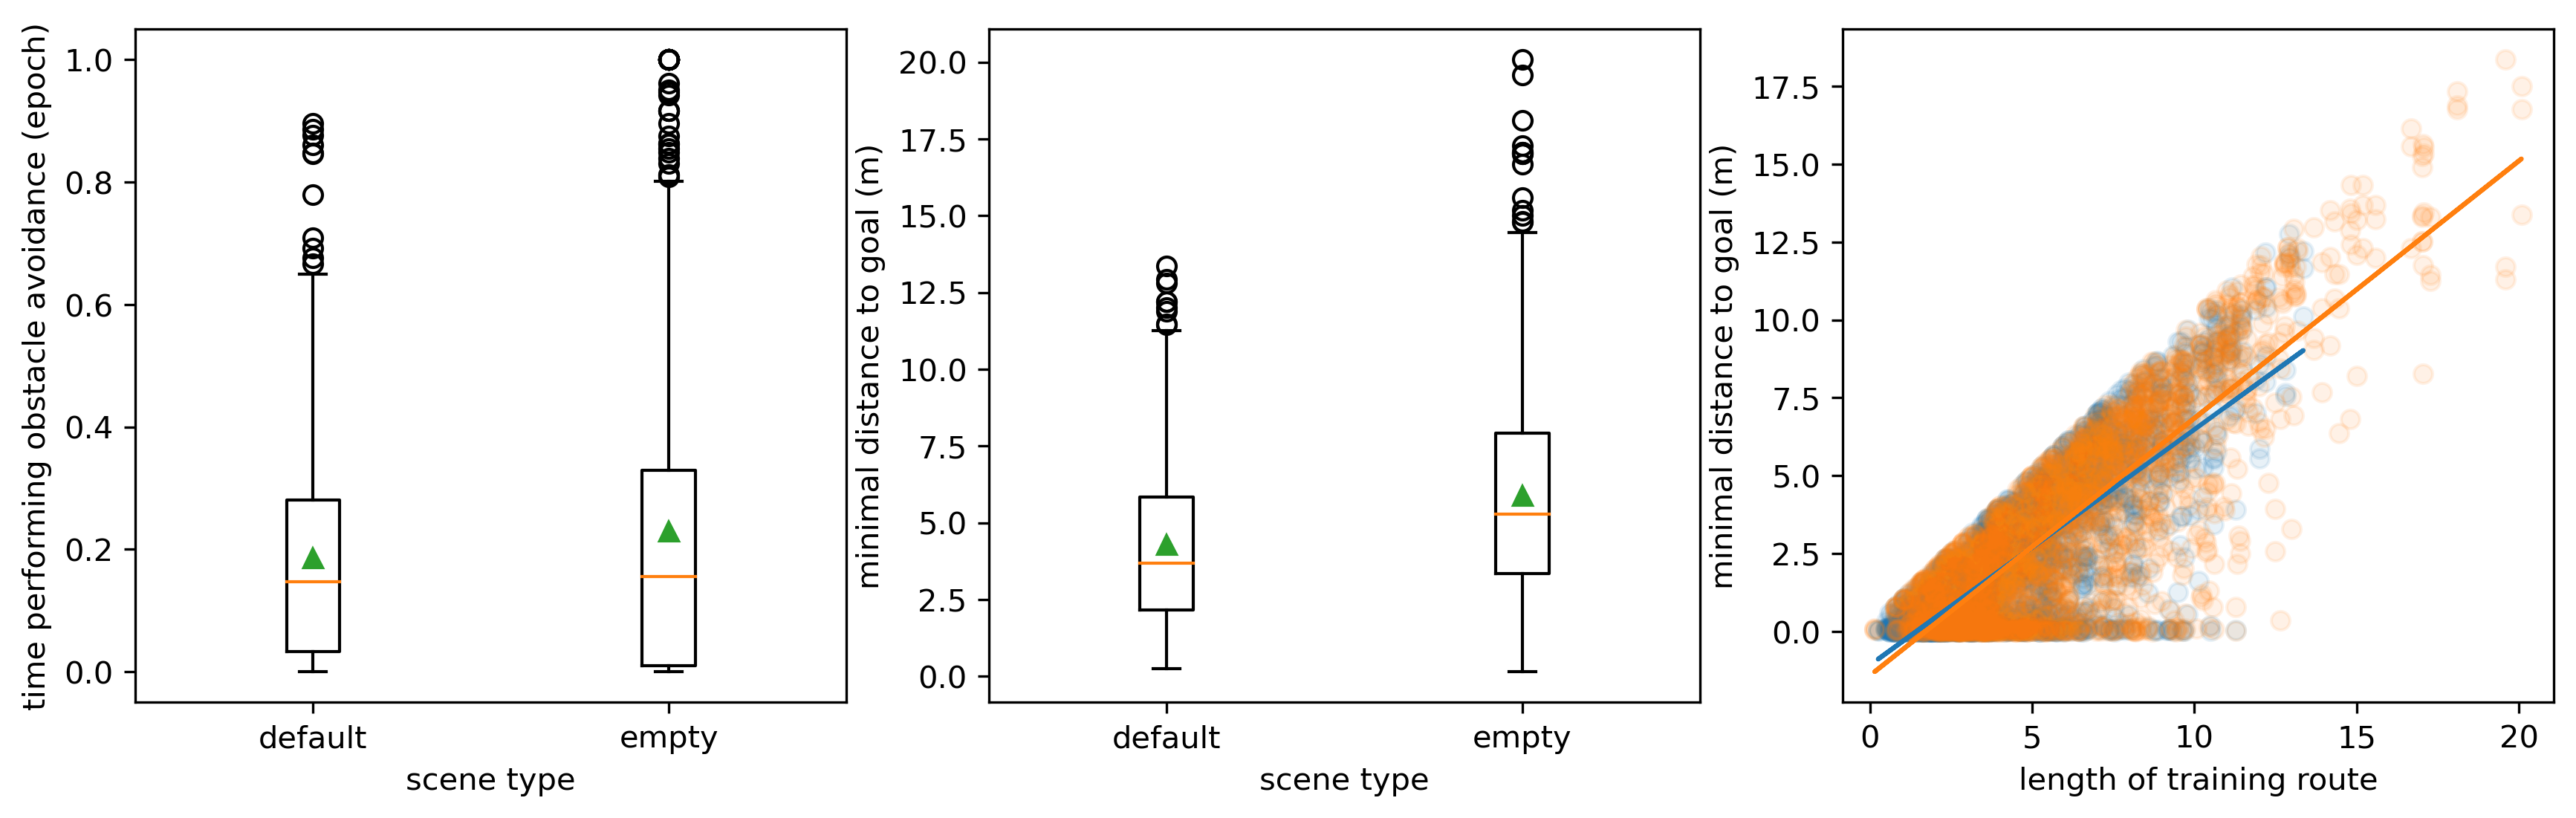

In [76]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4), dpi=300)

aa = np.ravel(cp_default[model_name]['test_p'])
bb = np.ravel(cp_empty[model_name]['test_p'])
axes[0].boxplot([aa, bb], showmeans=True, labels=['default', 'empty'])
tt = stats.ttest_ind(aa, bb, alternative='greater')
print(tt)

aa = np.ravel(i2g_default)
bb = np.ravel(i2g_empty)
axes[1].boxplot([aa, bb], showmeans=True, labels=['default', 'empty'])
tt = stats.ttest_ind(aa, bb, alternative='less')
print(tt)

for x_data, y_data in zip((i2g_default, i2g_empty), (mind_default.values(), mind_empty.values())):
    aa, bb = [], []
    xx = x_data
    for yy in y_data:
        aa.append(xx)
        bb.append(yy)
        
    aa = np.ravel(aa)
    bb = np.ravel(bb)
    axes[2].scatter(aa, bb, alpha=0.1)
    res = stats.linregress(aa, bb)
    axes[2].plot(aa, res.intercept + res.slope*aa)
    
print(res.slope, res.rvalue, res.pvalue)

for ax, xl, yl in zip(axes, 
                      ('scene type', 'scene type', 'length of training route'),
                      ('time performing obstacle avoidance (epoch)', 'minimal distance to goal (m)', 'minimal distance to goal (m)')):
    ax.set_ylabel(yl)
    ax.set_xlabel(xl)